# **Ultimate Data Science Challenge**

## *Part 1- Exploratory Data Analysis*

In [3]:
# Import relevant library
import json

# Open and read the JSON file
with open('logins.json', 'r') as file:
    data = json.load(file)

# Print the data
for k,v in data.items():
    print(k,v[0])

# Extract time information
times = data['login_time']

login_time 1970-01-01 20:13:18


In [4]:
# Import pandas to convert data to datetimes
import pandas as pd

times = pd.to_datetime(times)

In [5]:
# Create a DataFrame for better grouping later
df = pd.DataFrame({'time': times})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
# Create 15 minute intervals using dt.floor
df['interval'] = df['time'].dt.floor('15min')
df

,time,interval
0,1970-01-01 20:13:18,1970-01-01 20:00:00
1,1970-01-01 20:16:10,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970-01-01 20:15:00
4,1970-01-01 20:26:21,1970-01-01 20:15:00
...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:45:00
93138,1970-04-13 18:43:56,1970-04-13 18:30:00
93139,1970-04-13 18:54:02,1970-04-13 18:45:00
93140,1970-04-13 18:57:38,1970-04-13 18:45:00


In [7]:
# Use groupby to group times by interval column and gather count
counts = df.groupby('interval').count()
counts

,time
interval,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


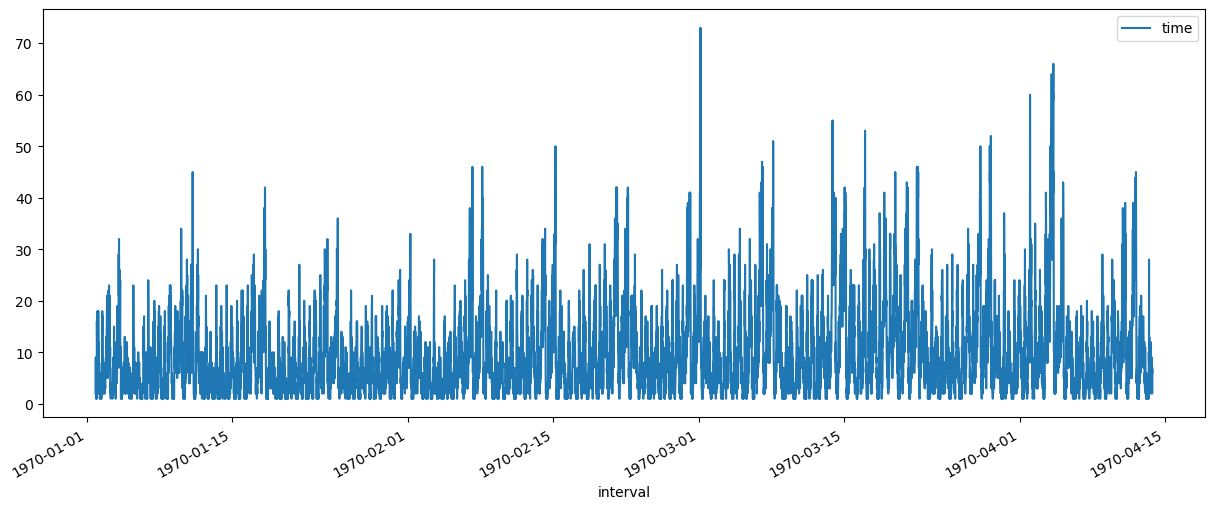

In [8]:
# Plotting results
counts.plot(figsize=(15,6));

From here, data can be grouped by month, or even day, to look at trends over particular time frames. Time frames of interest would be those with spikes, like the maximum value seen around March.

## *Part 2- Experiment and Metrics Design*

1) What would you chose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

   If all tolls costs will be reimbursed, this means that the toll bridge will still collect the tolls. Therefore, a good measure of success would be in terms of dollars collected from the tolls. If there is a record high seen, this means that the experiment succeeded. If numbers stayed around the same or for some reason decreased, then the experiment failed.

2) Describe a practical experiment you would design to compare the effectiveness of the 
proposed change in relation to the key measure of success. Please provide details on:

    a) how you will implement the experiment

    The experiment will be implemented after both cities have been notified of the reimbursement plan. Following the notification, data from the next month will be treated as a sample and compared to data from the previous month (the month before the plan was implemented).

    b) what statistical test(s) you will conduct to verify the significance of the observation

    I will perform a two-sided difference of means test. The null hypothesis will assume that there is no difference in the population means (in other words, the samples come from the same population) and a p-value will be set. Since population parameters are unknown, sample means and sample standard deviations will be used to calculate a t statistic. Once the t statistic is calculated, the probability of getting such a result will be determined from a t-distribution chart. If this probability is less than the p-value, we will reject the null hypothesis as there is evidence to support the alternative (the means of the populations are not equal). However, if this probability is greater than the p-value, we will fail to reject the null hypothesis.

    c) how you would interpret the results and provide recommendation to the city operations team along with any caveats.

    As mentioned before, an increase in money collected from tolls would imply success, and no change or a decrease would imply failure. The degree of these changes would affect my recommendation and would be communicated clearly to the city operations team. For example, let's assumne a slight increase is observed. This would achieve our goal. However, if the increase is so slight to where the benefits from achieving our goal does not outweigh the cost of toll reimbursements, then my recommendation would be to not proceed with the experiment.

## *Part 3- Predictive Modeling*

### Question 1

In [18]:
# Open and read the JSON file
with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)

# Put data into a DataFrame
df = pd.DataFrame(data)
print(df.info())
print("\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None




,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [19]:
# Parse dates for better model building later
columns = ['signup_date', 'last_trip_date']

df[columns[0]] = pd.to_datetime(df['signup_date'])
df[columns[1]] = pd.to_datetime(df['last_trip_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

69.22% of the observed users were retained


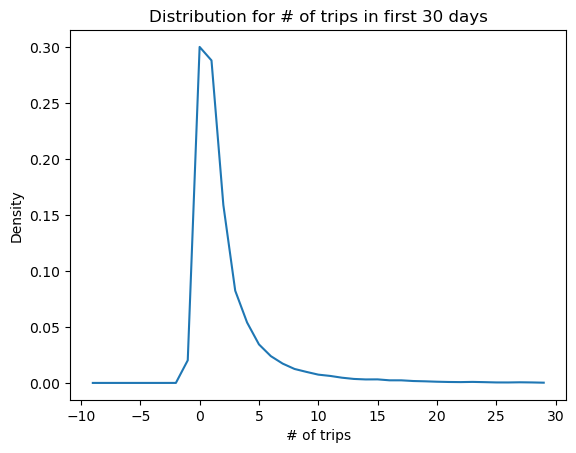

In [20]:
# Before dropping any missing values, looking at question of interest
print(f"{(df['trips_in_first_30_days'] > 0).sum() / df.shape[0]:.2%} of the observed users were retained")

# Creating graph to visualize the distribution for tripss_in_first_30_days
import matplotlib.pyplot as plt

positive = [*range(30)]
negative = [x*-1 for x in range(10)]
index = sorted(set(negative+positive))
df['trips_in_first_30_days'].plot.kde(ind=index)
plt.xlabel('# of trips')
plt.title('Distribution for # of trips in first 30 days');

### Question 2

##### Missing Values

In [23]:
# Looking at columns with missing values
columns = ['avg_rating_of_driver', 'phone', 'avg_rating_by_driver']

for column in columns:
    print(df[column].value_counts(dropna=False))
    print("\n")

avg_rating_of_driver
5.0    20771
NaN     8122
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.7        2
1.8        2
1.9        1
1.6        1
2.2        1
Name: count, dtype: int64


phone
iPhone     34582
Android    15022
None         396
Name: count, dtype: int64


avg_rating_by_driver
5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
NaN      201
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2


In [24]:
# For loop to determine which missing values to drop
for column in columns:
    print(f"{column} missing values(% of total): {df[column].isna().sum()/df.shape[0]*100}")

avg_rating_of_driver missing values(% of total): 16.244
phone missing values(% of total): 0.792
avg_rating_by_driver missing values(% of total): 0.402


In [25]:
# The first column cannot be dropped
# Will fill null values with the mean
df[columns[0]] = df[columns[0]].fillna(df[columns[0]].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [26]:
# Missing values in last two columns account for around 1% of the data
# Based on values seen through value counts, avg_rating_by_driver could potentially be useful
# phone will likely not be useful in a model so this column can be dropped
# Will go ahead and drop city as well
df = df.drop([columns[1], 'city'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.5 MB


In [27]:
# All records containing missing values from avg_rating_by_driver column will be dropped
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49799 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49799 non-null  int64         
 1   signup_date             49799 non-null  datetime64[ns]
 2   avg_rating_of_driver    49799 non-null  float64       
 3   avg_surge               49799 non-null  float64       
 4   last_trip_date          49799 non-null  datetime64[ns]
 5   surge_pct               49799 non-null  float64       
 6   ultimate_black_user     49799 non-null  bool          
 7   weekday_pct             49799 non-null  float64       
 8   avg_dist                49799 non-null  float64       
 9   avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.8 MB


##### Feature Engineering

In [29]:
# Gathering number of months between signup_date and last_trip_date
length_active = df['last_trip_date'].dt.month - df['signup_date'].dt.month

# Using mask to create new column to later use as target feature
df['sixth_month_active'] = length_active >= 6

##### Model Building

In [31]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

# init setup on exp
exp.setup(df, target = 'sixth_month_active', session_id = 123)

,Description,Value
0,Session id,123
1,Target,sixth_month_active
2,Target type,Binary
3,Original data shape,"(49799, 11)"
4,Transformed data shape,"(49799, 15)"
5,Transformed train set shape,"(34859, 15)"
6,Transformed test set shape,"(14940, 15)"
7,Numeric features,7
8,Date features,2
9,Preprocess,True


In [32]:
# compare baseline models
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8210
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0230
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1330
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0250
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1890
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1070
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0820
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.7010
nb,Naive Bayes,0.9999,1.0000,0.9896,1.0000,0.9947,0.9947,0.9947,0.0230
qda,Quadratic Discriminant Analysis,0.9948,1.0000,0.5322,1.0000,0.6371,0.6354,0.6909,0.0280


There are multiple models that achieve perfection in all available metrics. Most notably among these is the logistic regression model.

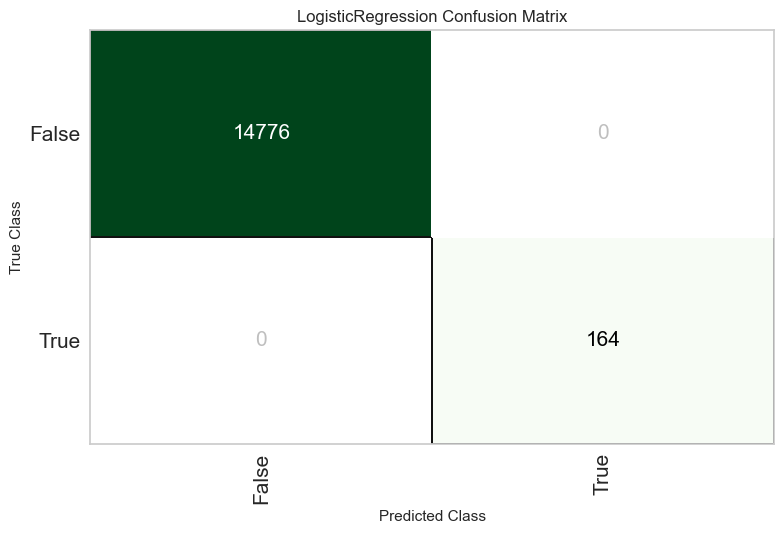

In [34]:
# plotting confusion matrix to confirm results
exp.plot_model(best, plot = 'confusion_matrix')

In [35]:
# saving pipeline for easier implementation
exp.save_model(best, 'Ultimate_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None,
                                     include=['signup_date', 'last_trip_date'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['trips_in_first_30_days',
                                              'avg_rating_of_driver',
                                              'avg_surge', 'surge_pct',
                                              '...
                                                               fill_value=None,
                                                               keep_empty

My approach involved:
>adjusting data types.
>
>answering important questions before data alterations.
>
>handling missing values.
>
>dropping irrelevant columns.
>
>feature engineering.
>
>leveraging a model building library to examine multiple models quickly.

These are common steps of the data science pipeline and fit the needs of this particular dataset. This makes me confident in my approach. The evaluation metrics further validate my work.

### Question 3

In [39]:
print(f"Long term rider retention rate roughly {df['sixth_month_active'].sum() / df.shape[0]:.2%}")

Long term rider retention rate roughly 1.10%


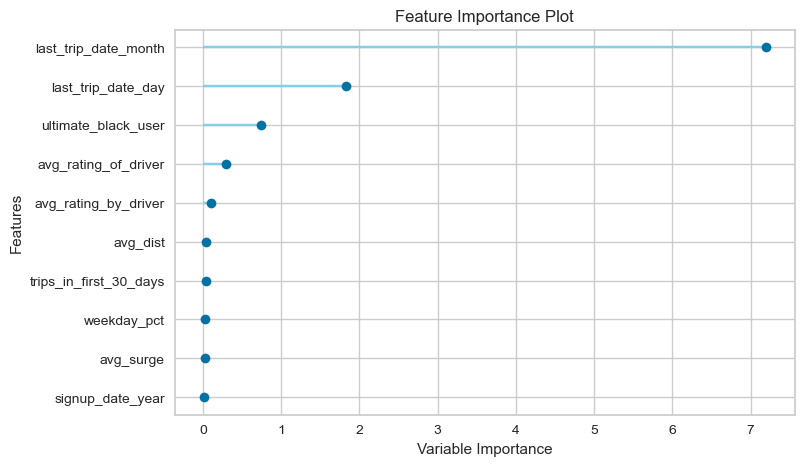

In [40]:
exp.plot_model(best, plot = 'feature')

Ultimate can leverage this insight to drive business decisions. The most important features are those involving how active a user is. Ultimate needs to find ways to keep their users active. Looking at the third feature, it seems this is exactly what they are trying to do (assuming ultimate_black_user indicates users with a premium subscription). Finding ways to improve the premium experience to increase the amount of subscriptions, along with careful monitoring of the highly developed model, will surely lead to a better long term rider retention rate.